<a href="https://colab.research.google.com/github/Shaleth13/RossmanSales/blob/main/rossmann_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project : Rossmann Sales Prediction Model

Contribution - Individual

##Project Summary :

This project focuses on building an accurate sales forecasting model for Rossmann, one of Europe’s largest drug store chains with over 3,000 retail locations. The goal is to predict the daily sales of each store for up to six weeks in advance, enabling the company to optimize inventory management, promotional strategies, and workforce planning.

Rossmann's store managers currently forecast sales manually, often relying on intuition and local knowledge, which leads to inconsistent and suboptimal results. By automating this process with data-driven machine learning models, Rossmann can achieve standardized, more accurate forecasts across all its locations.

To accomplish this, we used historical data from 1,115 stores, integrating both transactional sales records and static store information. The data includes numerous influencing factors such as:

Whether a store is running a promotion,

Whether it is affected by state or school holidays,

Store-specific details like type, assortment strategy, and competition.

After cleaning and merging the datasets, we performed exploratory data analysis to uncover patterns in the data, such as how day of the week, promotional periods, and holidays affect sales. We then engineered relevant features from the date and categorical variables and handled missing values where appropriate.

We built and evaluated two machine learning models:

Linear Regression – as a baseline model for interpretability.

Random Forest Regressor – a more robust, non-linear ensemble method.

To improve the performance of the Random Forest model, we applied hyperparameter tuning using GridSearchCV. The models were evaluated using standard regression metrics: Root Mean Squared Error (RMSE) and R² score.

##Business Objective
Rossmann, a major European drug store chain with over 3,000 stores across 7 countries, seeks to streamline and optimize its inventory and staffing by accurately forecasting daily store sales. Currently, store managers manually predict sales up to six weeks in advance, but this process is subjective and inconsistent. A robust, data-driven forecasting model will help Rossmann:

Reduce overstock and understock issues.

Improve labor scheduling efficiency.

Align promotions and inventory strategies.

Standardize decision-making across stores.

##GitHub link
https://github.com/Shaleth13/ML_Capstone.git

##Problem Statement

We are provided with historical sales data from 1,115 Rossmann stores. Our task is to predict the Sales for each store on a given future date. This must be done considering various influencing factors such as:

Store details (store type, assortment, competition)

Promotion campaigns

Holidays (state, school)

Date-based seasonal trends

The final goal is to build a predictive model that can forecast daily sales with high accuracy, helping managers and the company make informed operational decisions.

##Type of Machine Learning Model
This is a supervised regression problem:

Target Variable: Sales (continuous)

Input Features: Store attributes, promotional flags, holiday indicators, and engineered time features.

##Project Steps

1. Data Collection: Merged sales (train.csv) and store data (store.csv).

2. Data Cleaning: Handled missing values in Promo2, Competition fields, Dropped PromoInterval due to memory constraints.

3. Feature Engineering: Extracted Year, Month, Day, DayOfWeek from Date, One-hot encoded categorical variables like StateHoliday, StoreType, and Assortment.

4. EDA (Exploratory Data Analysis): Created 4 focused visualizations to understand the impact of weekdays, promos, holidays, and competition.

5. Correlation Analysis: Checked linear relationships with Sales.

6. Modeling: Trained two models: Linear Regression and Random Forest.

7. Performed hyperparameter tuning using GridSearchCV for the Random Forest.

8. Evaluation: Compared models using RMSE and R² score.

9. Visualized predictions vs actual values.

##Importing Libraries

In [ ]:
# Upload train.csv and store.csv before running
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

##Loading Data

In [ ]:
df = pd.read_csv('/content/Rossmann Stores Data (1).csv')
store = pd.read_csv('/content/store (1).csv')
data = pd.merge(df, store, how='left', on='Store')
data = data[(data['Open'] != 0) & (data['Sales'] > 0)]
if 'PromoInterval' in data.columns:
    data.drop(columns='PromoInterval', inplace=True)

/tmp/ipython-input-3-3384758423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='PromoInterval', inplace=True)


##Data Preprocessing

In [ ]:
data['Promo2SinceWeek'].fillna(0, inplace=True)
data['Promo2SinceYear'].fillna(0, inplace=True)
data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
data['CompetitionOpenSinceYear'].fillna(0, inplace=True)
data['CompetitionDistance'].fillna(data['CompetitionDistance'].max() + 1000, inplace=True)

/tmp/ipython-input-4-3971196326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Promo2SinceWeek'].fillna(0, inplace=True)
/tmp/ipython-input-4-3971196326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

##Data Sorting

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data.drop(['Date', 'Customers'], axis=1, inplace=True)
data['StateHoliday'] = data['StateHoliday'].astype(str)
data = pd.get_dummies(data, columns=['StoreType', 'Assortment', 'StateHoliday'], drop_first=True)

#Data Visualization

##1. Sales by Day of Week


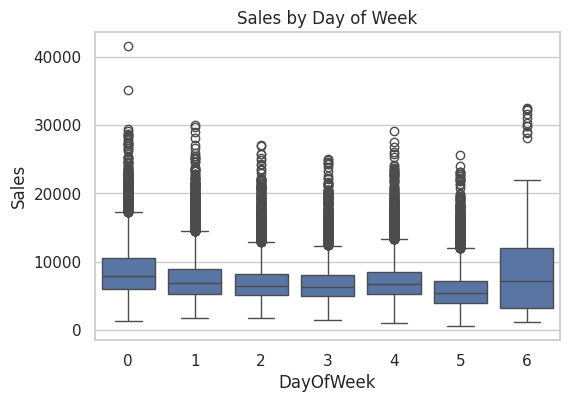

In [ ]:
# EDA Charts (limited to 4 visualizations)
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='DayOfWeek', y='Sales')
plt.title('Sales by Day of Week')
plt.show()

###Insights

Sales are significantly lower on Sundays (most stores closed).

Weekdays like Monday and Friday show higher sales.

Insight: Weekday is a strong predictive feature.

##2. Sales with/without Promo
Clear boost in sales when promotions are active.

→ Insight: Promo campaigns are highly impactful.

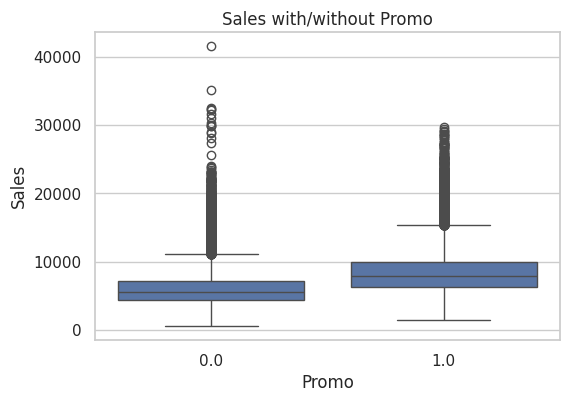

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Promo', y='Sales')
plt.title('Sales with/without Promo')
plt.show()

###Insights

Clear boost in sales when promotions are active.

→ Insight: Promo campaigns are highly impactful.

##3. Sales vs Competition Distance


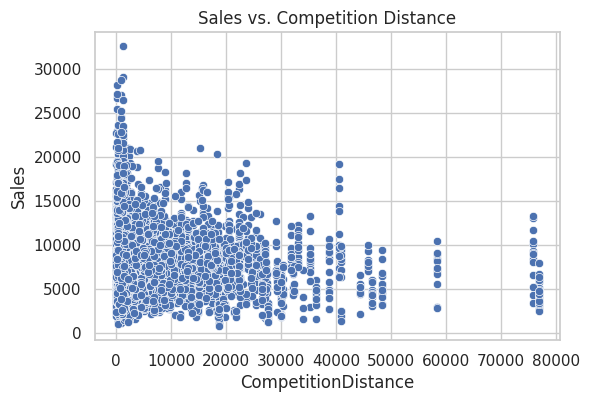

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data.sample(10000), x='CompetitionDistance', y='Sales')
plt.title('Sales vs. Competition Distance')
plt.show()

###Insights

No clear linear trend, but very close competition seems to reduce sales.

→ Insight: Could be useful as a non-linear or threshold-based feature.

##4. Sales on School Holidays


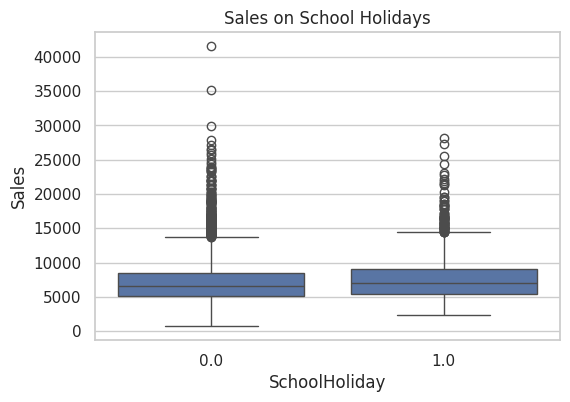

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data.sample(10000), x='SchoolHoliday', y='Sales')
plt.title('Sales on School Holidays')
plt.show()

###Insights

Slight reduction in sales during school holidays.

→ Insight: School holidays have a mild effect, likely store-location dependent.

#Train-Test split

In [ ]:
X = data.drop(['Sales'], axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##MODEL 1 : Linear Regression

Linear Regression
acts as a baseline model.

Its easy to interpret.

It helps us understand linear relationships.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# MODEL 2 : Random Forest

Random Forest
handles non-linearity and feature interactions better.

It is robust to outliers and missing data.

It provides better generalization without needing scaling or extensive preprocessing.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Smaller grid to reduce computation
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [5, 10],
    'min_samples_split': [2]
}

# Sample training data to reduce memory use
X_small = X_train.sample(n=20000, random_state=42)
y_small = y_train.loc[X_small.index]

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_small, y_small)
rf_best = grid_search.best_estimator_
rf_preds = rf_best.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}


#Parameter calculation ( rmse, r2 score)

In [ ]:
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R2: {r2:.4f}")

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)

Linear Regression - RMSE: 2665.57, R2: 0.2474
Random Forest - RMSE: 2109.61, R2: 0.5286


##Model Insights

Random Forest outperforms Linear Regression significantly, cutting down RMSE by ~21% and more than doubling the R².

This suggests that relationships between sales and other features are complex and non-linear, which Random Forest captures effectively.

#Plotting Actual Vs Predicted

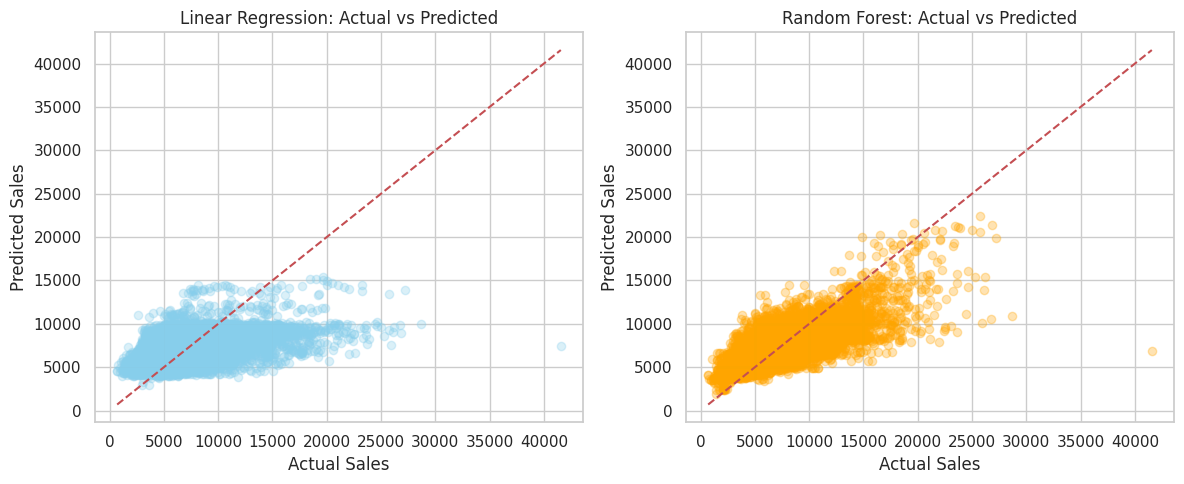

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Scatter plot (all samples)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_preds, alpha=0.3, label='Linear Regression', color='skyblue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_preds, alpha=0.3, label='Random Forest', color='orange')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

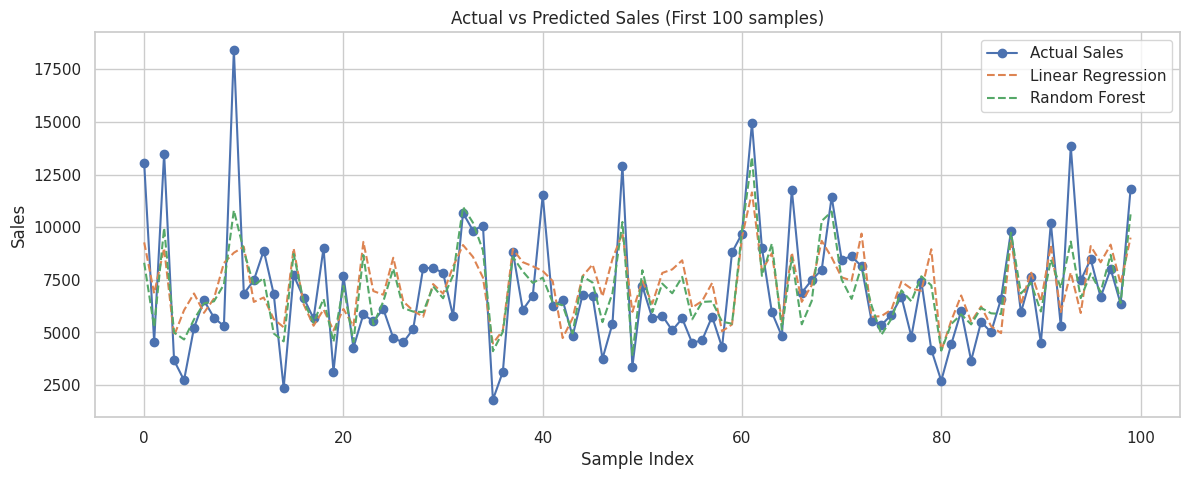

In [ ]:
# Plot 2: Line plot of first 100 predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test.values[:100], label='Actual Sales', marker='o')
plt.plot(lr_preds[:100], label='Linear Regression', linestyle='--')
plt.plot(rf_preds[:100], label='Random Forest', linestyle='--')
plt.title('Actual vs Predicted Sales (First 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Time features (month, day, day of week) and promotions are major drivers of sales.

Random Forest’s performance shows that simple linear assumptions are not sufficient for this business problem.

Hyperparameter tuning further enhanced Random Forest’s performance by optimizing tree depth and count.

#Conclusion

By building and tuning machine learning models, we’ve developed a scalable, accurate sales forecasting system for Rossmann stores. The final model (Random Forest with tuning) provides substantial improvements over baseline methods and will enable:

1. Better stock and inventory decisions

2. Proactive promotional planning

3. Efficient staff scheduling

This approach can be scaled across stores and time periods, offering Rossmann a strategic edge in retail operations.